CSC 593: Final Project

Title: Descriptive analysis of the effects of Cultural cognition and racial background on the performance of a student 

Background

The dataset that is being used for this project depicts a sample taken from a student population of a university. It represents a section of freshman students, and the data was collected for a project that envisioned to assist in identifying the need for an early intervention for students after their first exam. The office of enrolment course registration data was used to collect the information.However, refining manupilation had been done by the analyist of this project before using it for this project. The prior manuplation of the data is not included in this project report. 
The data set have differet information and fields with major catagories including demographic, acadamic plan, course workload, and academic history based on SAT scores. However, for this project the targeted fields are "race" (as a proxy for background, economic status, and cultural cognition),"Diagnostic Exam", "Exam One", "Module 1", "Academic Plan", and "total course load".
Here in this report the main focus of the study is to investigate the effects of cultural cognition and racial background on a students performace. We try to evaluate different relationships and try identify if there is a reasonable pattern that can describe the relationships between these social factors and academci achievement. To that end, this project uses exam results from one of the core courses in STEM field. 
Diagnostic Exam: a test given to students on the first day of class to check and caliber their preparation and prior background for the course material.
Module 1: a test administered after the first unit of the course material.
Exam One: a test adminstered after three units of the course material.

Hypothesis: Null: The background and culural cognition of a student affect student's preparedness for college and success in college.
Alternative: A student's prepardness for college and success in college are not related to background and cultural cognition.

Data Processing

The dataset was uploaded to the dataset repisitory and got loaded into the jupiter note book using the pd.read_excel() code (see below). As mentioned above the author had done a pre-clean up of the data in the excel before importing for this project. During that clean up the data was made unanimous and uncessary columns were dropped. No further data clean using python was necessary to do the work needed for this project except changing long field titles for columns (eg. "Exam One" to "Exam1" and dropping NA values in "Exam1", "DigEx", and "Mod1" fields as renamed later (see below). 

In [1]:
#### LOAD ALL THE NECESSARY PACKAGES 
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols
%matplotlib inline

In [2]:
#Loading the dataset
Project=pd.read_excel('../dataset/CSC_project.xlsx')


In [3]:
#Data cleaning and renaming of long column heads to make it suitable for calling in future analysis codes 
pd.DataFrame(Project)
print (Project.columns)
Project.rename(columns= {'Exam One':'Exam1','Diagnostic Exam ':'DigEx','First Module ':'Mod1'},inplace=True)
print (Project.columns)

Index(['Code', 'GENDER', 'ETHNICITY', 'FIRST_GEN', 'HOME_CITY', 'HOME_STATE',
       'PELL_IND', 'TD_IND', 'FERPA_FLG', 'PRIMARY_PROGRAM', 'PRIM_PROG_DESCR',
       'ACAD_PLAN1', 'ACAD_PLAN1_DESCR', 'ACAD_LEVEL', 'UNITS_TAKING',
       'TOT_CUM_CREDITS', 'CUM_GPA', 'SAT_SCORE', 'ACT_SCORE', 'HS_CONV_GPA',
       'STEM_CRSE_COUNT_TERM', 'STEM_CRSE_COUNT_TOTAL', 'Exam One',
       'Diagnostic Exam ', 'First Module ', 'Subject Enhancement Project'],
      dtype='object')
Index(['Code', 'GENDER', 'ETHNICITY', 'FIRST_GEN', 'HOME_CITY', 'HOME_STATE',
       'PELL_IND', 'TD_IND', 'FERPA_FLG', 'PRIMARY_PROGRAM', 'PRIM_PROG_DESCR',
       'ACAD_PLAN1', 'ACAD_PLAN1_DESCR', 'ACAD_LEVEL', 'UNITS_TAKING',
       'TOT_CUM_CREDITS', 'CUM_GPA', 'SAT_SCORE', 'ACT_SCORE', 'HS_CONV_GPA',
       'STEM_CRSE_COUNT_TERM', 'STEM_CRSE_COUNT_TOTAL', 'Exam1', 'DigEx',
       'Mod1', 'Subject Enhancement Project'],
      dtype='object')


In [4]:
#Droping NA values for the fields Exam1,DigEx,and Mod1 where there are some records missing
Project.dropna(subset=['Exam1', 'DigEx', 'Mod1'], inplace=True)

Analysis

Question 1: The first research question this study is trying to address is the existance of a meaningfull relationship between a student's background and the student's preparation for college level study.

To that end we will try to see if there is a significant pattern connecting ethnicity and diagnostic exam fields in the sample using descriptive statistics where background is represented by ethnicity as a proxy and prepardness test by the resutlts of the diagnostic exam. The dataset was grouped by ethnicity and the maximum and minimum values of the Diagnostic exam were ploted on the graph for each ethnicity group.

Based on the results shown below there is a relationship between a students background and preparedness for college education. In the results it is clear that the minimum value for diagnostic exam shows higher numbers for students identified as Asians and African Americans/Black,while there is no value counted for students who identified as white and 2 or more races.  

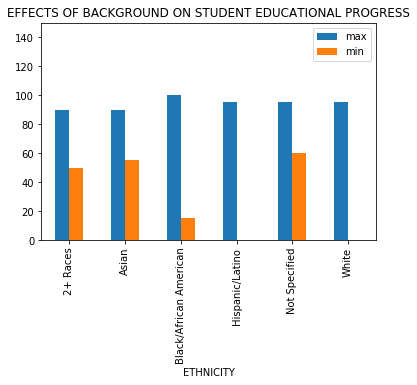

ETHNICITY
2+ Races                  50
Asian                     55
Black/African American    15
Hispanic/Latino            0
Not Specified             60
White                      0
Name: DigEx, dtype: int64

In [5]:
#sorting the dataset by ethnicity, connect it with the maximun and minimum values of diagnostic exam results for each group.
#plot the bargraph of the evaluated data.
Project.groupby('ETHNICITY').mean()['DigEx']
pmax = Project.groupby('ETHNICITY').max()['DigEx']
pmin = Project.groupby('ETHNICITY').min()['DigEx']
pdata = pd.DataFrame({'max': pmax,'min':pmin})
pdata.plot.bar()
plt.ylim(0, 150)
plt.title('EFFECTS OF BACKGROUND ON STUDENT EDUCATIONAL PROGRESS')
plt.show()
pmin


Furthermore, the study attempted to investigate the robustness of the above indicated relationship between background and preparedness for college by expanding the background proxies toward first generation and gender fields in order to cover all the subtle parts of the cultural cognition elements that play part on a student's background beyond ethniciity.
A linear regression approach was used to test this effect of cultural cognition on student's preparation for college level study. Using gender and first generation fields as predictor variables to explain the diagnostic exam results the linear regression model was run as follows.

In [6]:
#Setting a linear regression analysis to describe the results of exam one through the effects of Diagnostic exam, gender and
#first generation. Here a formula approach from the stats models is uesed, which uses C() to indicate a categorical variables.
#The formula assigns a dummy value to a catagoriacl variable and uses it in the regression. 
#This code was adopted from https://stackoverflow.com/questions/50733014/linear-regression-with-dummy-categorical-variables
#and modified to fit this project.
lm = ols('DigEx ~ C(GENDER) + C(FIRST_GEN)', data=Project)
lm1= lm.fit()
lm1.summary()



<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  DigEx   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.018
Method:                 Least Squares   F-statistic:                   0.03786
Date:                Tue, 17 Dec 2019   Prob (F-statistic):              0.963
Time:                        21:14:54   Log-Likelihood:                -499.32
No. Observations:                 112   AIC:                             1005.
Df Residuals:                     109   BIC:                             1013.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept            65.5803      3.312     19.798      0.000      59.015      72.145
C(GENDER)[T.M]        0.4924      4.239      0.116      0.908      -7.908       8.893
C(FIRST_GEN)[T.Y]     1.1839      4.352      0.272      0.786      -7.441       9.809
==============================================================================
Omnibus:                       24.762   Durbin-Watson:                   1.751
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               33.601
Skew:                          -1.137   Prob(JB):                     5.05e-08
Kurtosis:                       4.425   Cond. No.                         3.25
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The linear function of the regression: DigEx(GENDER,FIRST_GEN)=65.5803+04924GENDER+1.1839FIRST_GEN

In [7]:
#Printing the p-values of the above regression analysis
print(lm1.pvalues)

Intercept            6.833949e-38
C(GENDER)[T.M]       9.077231e-01
C(FIRST_GEN)[T.Y]    7.860944e-01
dtype: float64


The high p-values in this regressional analysis show support to the null hypothesis that there is a correlation between a students preparation for college and student's background and cultural cognition explained by gender and first generation fields in the dataset. In the context of background and cultural cognition we have also seen the effects of ethinicity as factor. Therefore, from out analysis it could be deduced that a students preparation as tested by the diagnostic exam shows that there is a strong relationship to the students background and cultural cognition. 

Question 2: Could this influence of cultural congnition and background influence the progress/success of a student in college? Can this relationship be used as predictor of a student's academic success when used with other initial test measures? 
In order to investigate this inherent connection between a student's success and background the author used the fields ethnicity, gender, and first generation to describe cultural cognition and background, while the results of Module 1 (Mod1) was used as a predictor of success to indicate as to how results of Exam One are reflected. 

In [8]:
#Setting a linear regression analysis to describe the results of exam one through the effects of Diagnostic exam, gender and
#first generation. Here a formula approach from the stats models is uesed, which uses C() to indicate a categorical variables.
#This code was adopted from https://stackoverflow.com/questions/50733014/linear-regression-with-dummy-categorical-variables
#and modified to fit this project.
lm2 = ols('Exam1 ~ Mod1 + C(GENDER)+ C(ETHNICITY) + C(FIRST_GEN)', data=Project)
lm3= lm2.fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Exam1   R-squared:                       0.154
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     2.350
Date:                Tue, 17 Dec 2019   Prob (F-statistic):             0.0231
Time:                        21:14:54   Log-Likelihood:                -490.08
No. Observations:                 112   AIC:                             998.2
Df Residuals:                     103   BIC:                             1023.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
==========================================================================================================
                                             coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
Intercept                                 43.2308      8.207      5.268      0.000      26.954      59.508
C(GENDER)[T.M]                            -0.9121      4.039     -0.226      0.822      -8.923       7.099
C(ETHNICITY)[T.Asian]                      8.8075     11.621      0.758      0.450     -14.239      31.854
C(ETHNICITY)[T.Black/African American]     6.9772     10.576      0.660      0.511     -13.997      27.952
C(ETHNICITY)[T.Hispanic/Latino]            6.6422      8.642      0.769      0.444     -10.497      23.781
C(ETHNICITY)[T.Not Specified]             26.1646     15.991      1.636      0.105      -5.550      57.879
C(ETHNICITY)[T.White]                     12.1658      7.292      1.668      0.098      -2.297      26.628
C(FIRST_GEN)[T.Y]                          2.2839      4.497      0.508      0.613      -6.635      11.203
Mod1                                       1.6061      0.513      3.129      0.002       0.588       2.624
==============================================================================
Omnibus:                       11.418   Durbin-Watson:                   1.910
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.806
Skew:                          -0.765   Prob(JB):                      0.00273
Kurtosis:                       3.437   Cond. No.                         92.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [9]:
#printing p-values of the regression model
print(lm3.pvalues)

Intercept                                 7.616668e-07
C(GENDER)[T.M]                            8.217939e-01
C(ETHNICITY)[T.Asian]                     4.502284e-01
C(ETHNICITY)[T.Black/African American]    5.108928e-01
C(ETHNICITY)[T.Hispanic/Latino]           4.438783e-01
C(ETHNICITY)[T.Not Specified]             1.048524e-01
C(ETHNICITY)[T.White]                     9.829024e-02
C(FIRST_GEN)[T.Y]                         6.126527e-01
Mod1                                      2.280686e-03
dtype: float64


The p-values greater than 0.05, which are exhibted for fields ETHNICITY, GENDER,and FIRST_GEN show that they have a strong factor in affecting the students outcome in Exam1, while the 0.002 p-value for Mod1 represents that the influence of Mod1 results on the students Exam1 results is negligible. This indicates that a student's progress and success is highly related to the students background and cultrual cognition. 

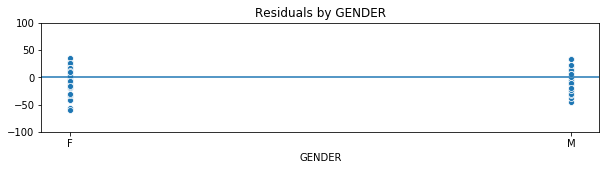

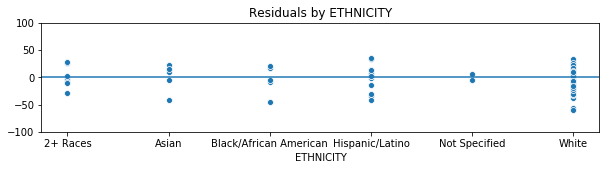

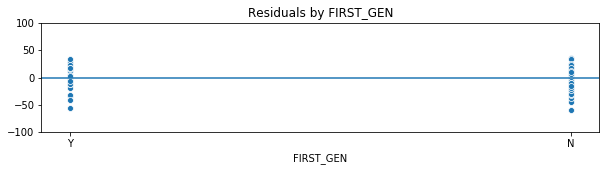

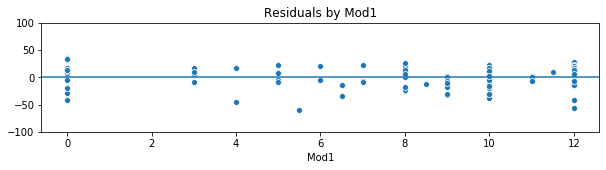

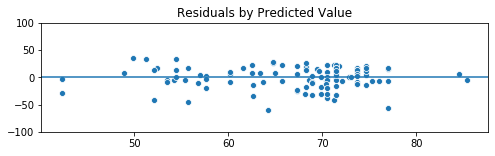

3.793790678433392e-14


In [10]:
#Using the residual test to measure the robustness (errors) of the prediction made using the linear regression
#testing residual by each predictor variable used in the regression analysis
for x in ('GENDER', 'ETHNICITY', 'FIRST_GEN','Mod1'):
    plt.figure(figsize=(10,2))
    sns.scatterplot(Project[x], lm3.resid)
    plt.title("Residuals by %s" % x)
    plt.ylim(-100, 100)
  
    plt.axhline(np.mean(lm3.resid))
    plt.show()
#testing residual of the predicted value
plt.figure(figsize=(8,2))
sns.scatterplot(lm3.predict(), lm3.resid)
plt.title("Residuals by Predicted Value")
plt.ylim(-100, 100)
plt.axhline(np.mean(lm3.resid))
plt.show()
#printing the mean of the residual
print(np.mean(lm3.resid))

Based on the assumption for residuals the above graphs show that the model satisfactorily fulfills the requirements. The graphs above and the statistical summary of the mean show that the model has a mean close to zero across the distribution, the vertical spread of the points is approximately constant between -50 and 50, appears to have a normal distribution where points are clustered close to zero on the y-axis of the graphs, and there is no relationship between the input variables and the residuals showing that variables are independent of one another.

Question 3: Does a student's envisioned career path (described by program of study) have an influence on students preparation for college and success in college? Would this relationship change (defy) the effects of cultural cognition and background.


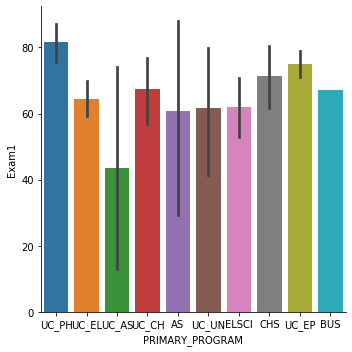

<Figure size 1152x576 with 0 Axes>

<function matplotlib.pyplot.show(*args, **kw)>

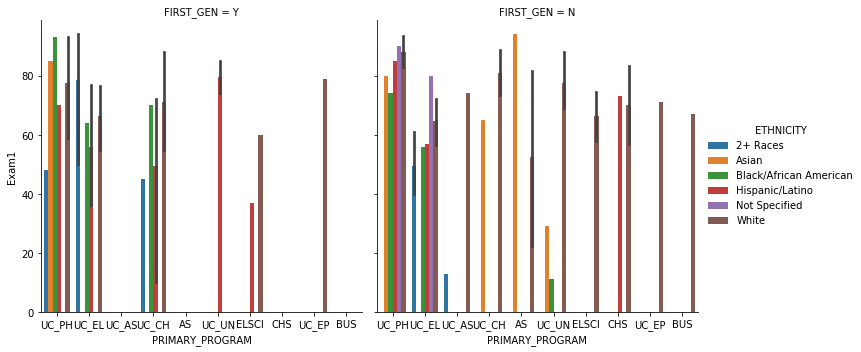

In [11]:
#Plotting Exam1 against Primary program to see if there is a significant difference between students of different programs
sns.catplot('PRIMARY_PROGRAM', 'Exam1', data=Project, kind='bar')
plt.figure(figsize=(16,8))
plt.show()

#adding other predictos ethnicity and first generation to the plot above to show how background influences the Exam1 results
sns.catplot('PRIMARY_PROGRAM', 'Exam1', hue='ETHNICITY', col='FIRST_GEN', data=Project, kind='bar')
plt.show


The above descriptive analysis of primary program with Exam1 results in its aggregated evaluation only shows the naturally expected difference between general groups of natural science and humnities.The details of distinction between students among program studies becomes more pronounced once we introduce ethnicity and first generations fields as predictors. The program choice difference between students of different background shows a distinct pattern. Most of all there is higher number of first generation students scoring higher points in the Exam1 for students identified as minorty groups, which is contrary to the results and predictions of the two research questions we evaluated in this project. This difference explains that the amount of work put into and the preparation made for college has correlation to the students envisoned career path. In the above plots we can see that students of minority groups both first generation college students and non-first generation who are in the Environmental and health sciences scored higher than the other group of programs.The scores tend to be lower than the general trend with students of non-first generation college students who are in the humnaities programs.  

Question 4: If cultrual cognition and background drive a students success in college and career path choice, therefore it is to be expected that a students result in the Diagnostic exam and Exam1 to remain more or less similar. 
To test this assumption, a students paired t-test was conducted on the fields DigEx and Exam1. 

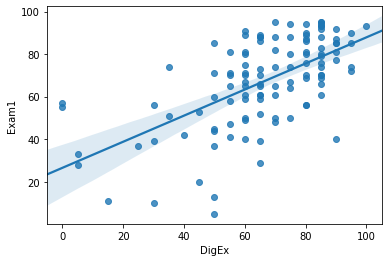

In [12]:
#plotting Exam1 against DigEx to see if the two values have a pattern and 
#fitting a regression line to the scatter plot to test correlation
sns.regplot('DigEx', 'Exam1', data=Project)
plt.show()

In [13]:
#independent t-test to test if the two fields Exam1 and DigEx results are statistically different from one another.
tstat, pval = stats.ttest_ind(Project.Exam1, Project.DigEx)
#printing the p-value of the t-test
print(pval)

0.7244408665866546


The t-test result shows that two fields are significantly different from each other. Therefore, there are other factors that played into the change of results from DigEx at the begining of the semester to the Exam1 results almost mid point of the semester. Therefore, we tried to look into if there is a relationship or pattern between the results in the diagnostic exam and the changes exhibited by students in exam one. A linear regression model (see below) was used to describe Exam1 via a single predictor DigEx (see below).The linear equation Exam1(DigEx)=26.5742+0.6131DigEx, has a p-value very close to zero showing a strong evidence against the null hypothesis for this question, which is Exam1 and DigEx are results of similar pattern. The results of this analysis conclude that students results shown in diagnostic exam and exam one have different factors influencing them. 

In [14]:
#linear regression model to describe Exam1 by DigEx as a predictor
lm4 = ols('Exam1 ~ DigEx', data=Project)
lm5= lm4.fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Exam1   R-squared:                       0.375
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     66.61
Date:                Tue, 17 Dec 2019   Prob (F-statistic):           5.69e-13
Time:                        21:15:00   Log-Likelihood:                -476.94
No. Observations:                 113   AIC:                             957.9
Df Residuals:                     111   BIC:                             963.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     26.5742      5.210      5.101      0.000      16.251      36.898
DigEx          0.6131      0.075      8.161      0.000       0.464       0.762
==============================================================================
Omnibus:                        7.977   Durbin-Watson:                   1.767
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.637
Skew:                          -0.605   Prob(JB):                       0.0220
Kurtosis:                       3.396   Cond. No.                         231.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
#printing the p-values of the regression for closer look
print(lm5.pvalues)

Intercept    1.406149e-06
DigEx        5.692343e-13
dtype: float64


In conclusion, the effect of cultural cognition and background on a student's preparation to college is much pronounced as evidenced in question one of this study, while different factors play into a students success in college as evidenced in questions through two to four in this study. Therefore, it needs more rigor statistical analysis and models to predict a students success in college based on the factors influencing the students preparation, level of work in college. This analysis of complex factors is beyond the scope and time of this project. 